In [167]:
import pandas as pd 
import numpy as np

# importing both datasets

we begin the first step by importing both the pandas and numpy libraries, which gives us the flexibility to be able too manipulate our data in both tabular or in series format, after which we import the dataset using pandas .read_csv method

In [168]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [169]:
sample_s = pd.read_csv('sample_submission.csv')

# EDA

WE begine our journey by carrying out an exploratory analysis of our datasets, to give us a feel of the dataset, as well as to aid us develop an intuitioon onhow best to deal with the business problem. we employ the use of graphs as well to explore relationships between features and generally give us an intuition from our dataset 

In [170]:
train_data.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [171]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     28831 non-null  object 
 1   age             28831 non-null  int64  
 2   job             28831 non-null  object 
 3   marital         28831 non-null  object 
 4   education       28831 non-null  object 
 5   default         28831 non-null  object 
 6   housing         28831 non-null  object 
 7   loan            28831 non-null  object 
 8   contact         28831 non-null  object 
 9   month           28831 non-null  object 
 10  day_of_week     28831 non-null  object 
 11  duration        28831 non-null  float64
 12  campaign        28831 non-null  int64  
 13  pdays           28831 non-null  int64  
 14  previous        28831 non-null  int64  
 15  poutcome        28831 non-null  object 
 16  emp_var_rate    28831 non-null  float64
 17  cons_price_idx  28831 non-null 

In [172]:
train_data.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from seaborn import despine

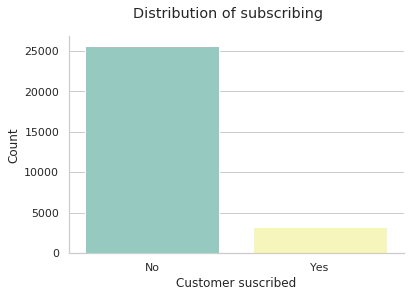

In [174]:
sns.set(style="whitegrid")

ax=sns.countplot(x='subscribed',palette="Set3", data=train_data)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer suscribed")
suptitle("Distribution of subscribing ")
despine()

As we can see from the distibution of our target variable, "subscribed", we can be able to denote that the data set is imbalanced, which is a key thing to note further down as we start of building our model, as we have here more cases of customers not subscribing to the service

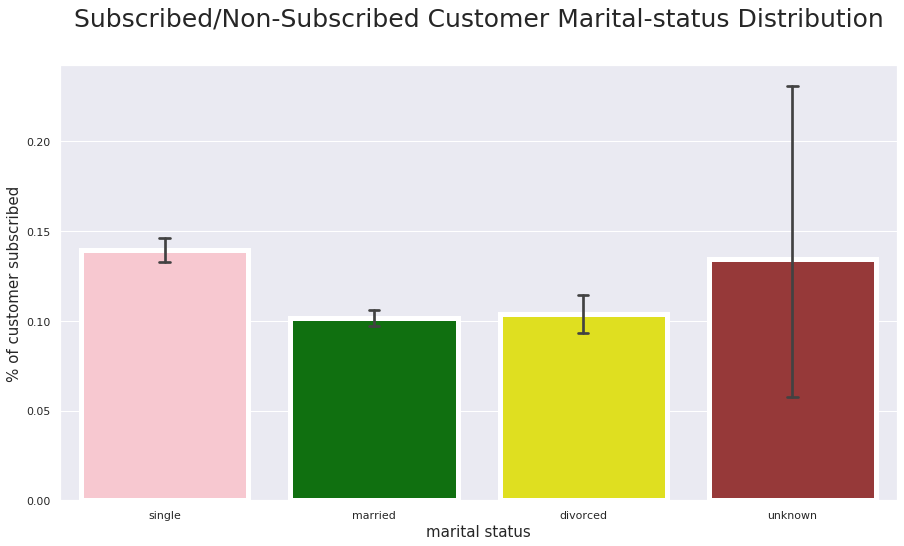

In [175]:
pal = {'married':"green", 'single':"Pink", 'divorced':"Yellow", 'unknown':"Brown"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "marital", 
                 y = "subscribed", 
                 data=train_data, 
                 palette = pal,
                 linewidth=5,
                 order = ['single','married','divorced','unknown'],
                 capsize = .05,

                )

plt.title("Subscribed/Non-Subscribed Customer Marital-status Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of customer subscribed", fontsize = 15, )
plt.xlabel("marital status",fontsize = 15);


this graph explores the relationship between the marital feature and our target variable, we can easily deduce, that married folks tend to subscribe to the service the least

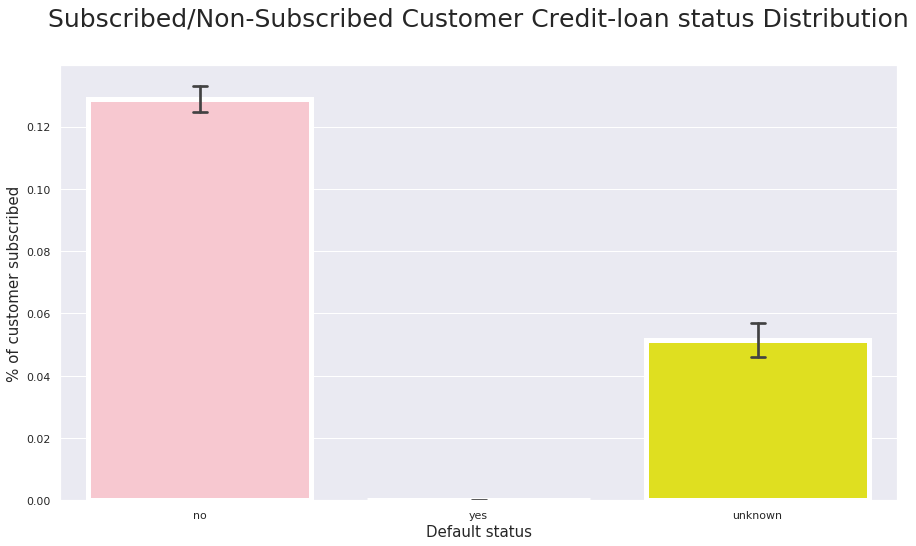

In [176]:
pal = {'yes':"green", 'no':"Pink", 'unknown':"Yellow"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "default", 
                 y = "subscribed", 
                 data=train_data, 
                 palette = pal,
                 linewidth=5,
                 order = ['no','yes','unknown'],
                 capsize = .05,

                )

plt.title("Subscribed/Non-Subscribed Customer Credit-loan status Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of customer subscribed", fontsize = 15, )
plt.xlabel("Default status",fontsize = 15);


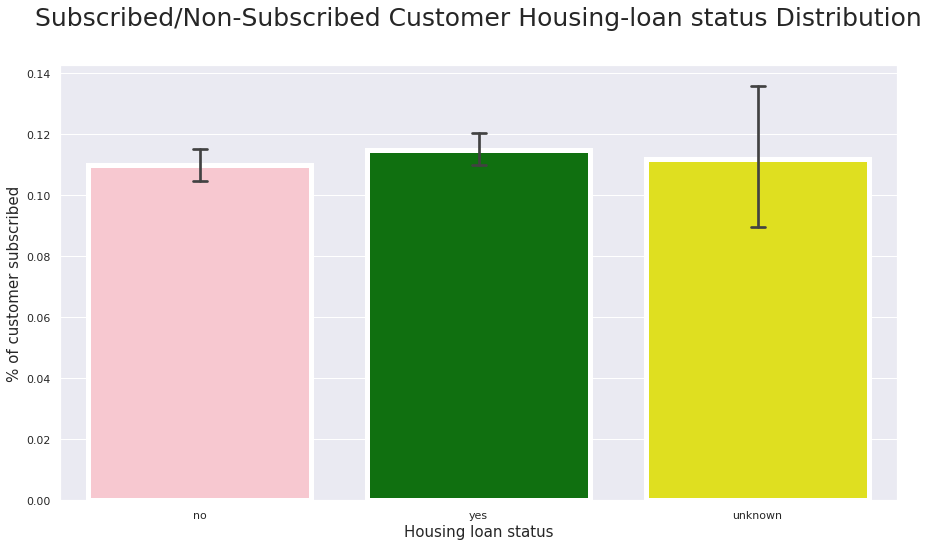

In [177]:
pal = {'yes':"green", 'no':"Pink", 'unknown':"Yellow"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "housing", 
                 y = "subscribed", 
                 data=train_data, 
                 palette = pal,
                 linewidth=5,
                 order = ['no','yes','unknown'],
                 capsize = .05,

                )

plt.title("Subscribed/Non-Subscribed Customer Housing-loan status Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of customer subscribed", fontsize = 15, )
plt.xlabel("Housing loan status",fontsize = 15);


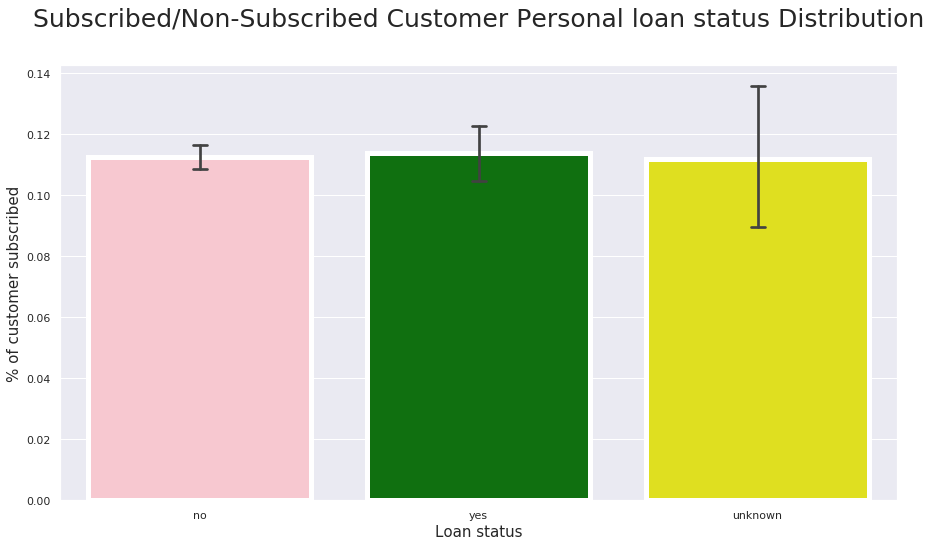

In [178]:
pal = {'yes':"green", 'no':"Pink", 'unknown':"Yellow"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "loan", 
                 y = "subscribed", 
                 data=train_data, 
                 palette = pal,
                 linewidth=5,
                 order = ['no','yes','unknown'],
                 capsize = .05,

                )

plt.title("Subscribed/Non-Subscribed Customer Personal loan status Distribution", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of customer subscribed", fontsize = 15, )
plt.xlabel("Loan status",fontsize = 15);


the following block of code plots a heatmap to explore relationship(correaltion) within the features, which will futher guide our intuition on making necesssary adjustments or dropping off features that are not needed(noisy data) to make our predictions further along the line. 

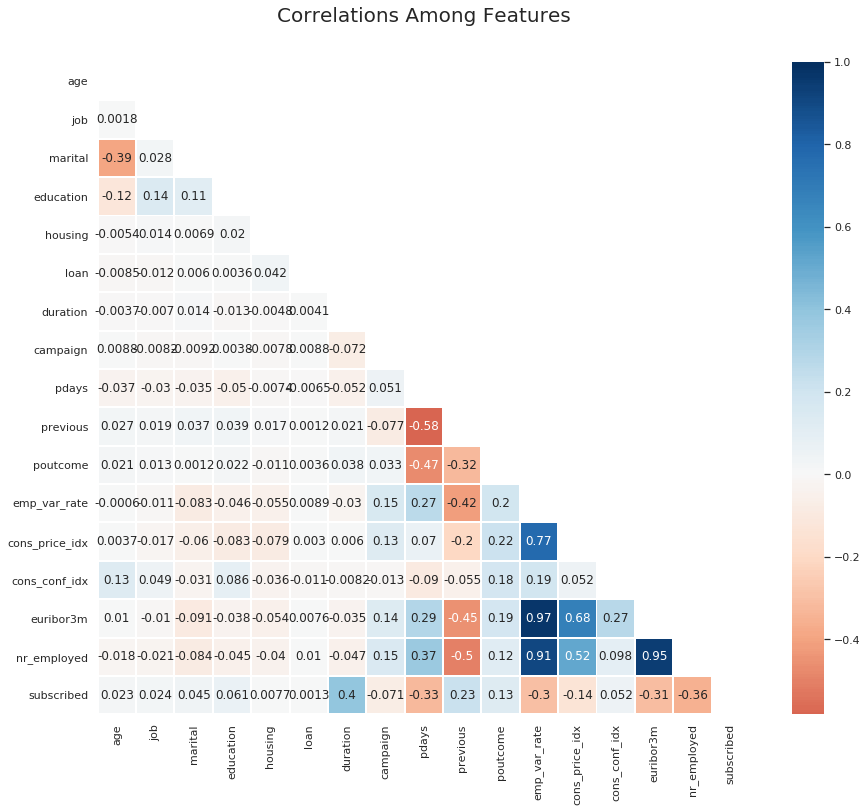

In [209]:
mask = np.zeros_like(train_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train_data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', 
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [179]:
from sklearn import preprocessing

train_data.drop(['customer_id','default','day_of_week','month','contact'], axis=1, inplace=True)
for x in train_data.columns:
    if train_data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_data[x].values))
        train_data[x] = lbl.transform(list(train_data[x].values))
        
test_data.drop(['customer_id','default','day_of_week','month','contact'], axis=1, inplace=True)       
for x in test_data.columns:
    if test_data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test_data[x].values))
        test_data[x] = lbl.transform(list(test_data[x].values))   
        
y = train_data['subscribed']
                

In this step above, utilsing sckits label encoder library, i encoded all of the catergorical features into numerical features, whilst dropping some features i deem irrelevant to our task at hand, using intuition from exploring relatiosnhips between the feature, i droped the columns customer id, default loan, the days of week, month and contact.

In [180]:
train_data.head()

,age,job,marital,education,housing,loan,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,31,0,1,6,0,0,1.283333,3,999,1,0,-2.97,46.3565,-23.10,1.711,5023.5,0
1,31,9,2,6,0,0,0.200000,4,999,0,1,-1.77,46.4465,-32.34,2.252,5099.1,0
2,47,1,1,1,2,0,4.616667,2,999,0,1,1.13,46.9970,-25.48,5.862,5191.0,0
3,36,7,1,6,0,0,1.166667,1,999,1,0,-1.77,46.4465,-32.34,2.329,5099.1,0
4,34,0,2,3,0,0,19.683333,9,999,0,1,-1.77,46.4465,-32.34,2.252,5099.1,0


In [181]:
pd.DataFrame(abs(train_data.corr()['subscribed']).sort_values(ascending = False))

,subscribed
subscribed,1.000000
duration,0.399154
nr_employed,0.355616
pdays,0.326485
euribor3m,0.309149
emp_var_rate,0.300379
previous,0.226691
cons_price_idx,0.135474
poutcome,0.130690
campaign,0.070794


# Base Model

Start off, building our base model with importing from the sckit package my train and test split for splitting the data into two parts, a larger portion for training the model and a much smaller portion for model validation and the min max scaler to scale all data points to within values of 0 and 1

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Initialize the min max scaler and fit my data set, while also dropping the target variable and saving it in a variable labelled as y

In [183]:
scaler = MinMaxScaler()
x = scaler.fit_transform(train_data.drop(['subscribed'], axis=1))
TestingData = scaler.fit_transform(test_data)
y = train_data['subscribed']

the precediing line of code splits the training data sets into the training and validation sets, the x and y train sets sto train the model on, and the x val and y val sets for model validation

In [184]:
X_train, X_val, y_train, y_val = train_test_split(x, y, random_state = 0)

the following block of code imports the model, which in this pparticular use case, the random trees classifiers model, also imports the gridsearch for cross validation,( which helps sorts out the imbalance in our datasets as well as optimize our model by selecting the best result giving parameters to use in the model) and the metric scores to test out how good/fit/precise/ accurate our model is in making the predictions

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc


In [186]:
estimators = [10, 50, 100, 200, 500] 
max_depths = [3, 6, 10, 15, 20] 

In [187]:
grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

In [188]:
model = RandomForestClassifier()
clf = GridSearchCV(model, grid_values, scoring='roc_auc', n_jobs=-1, verbose=10, cv=3)

the preceding line of code fits the model  on the training datasets and carries out the cross validation to optimize and search for the best performing parameters to use for the predictions later on

In [189]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 10, 15, 20],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='roc_auc', verbose=10)

In [190]:
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_

Next we instantiate our model, now fully equipped with best performing parameters with our random trees classifiers and also fitting our training datasets to it, and stage, the model begines to train on the data 

In [191]:
clf = RandomForestClassifier(n_estimators=best_n_estimators_value, max_depth=best_max_depth_value,min_samples_leaf=5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=500)

After training on the x train and y train portioans of the dataset, our model  is now ready to make its predictions on the x val data set, on the precediing lines of codes, we call the predic method on our x val data set to make the prediction

In [192]:
prediction = clf.predict_proba(X_val)[:,1]

In [203]:
predict = clf.predict(X_val)

In [193]:
prediction

array([0.00567775, 0.16689068, 0.03538984, ..., 0.40189323, 0.03304242,
       0.07564125])

In [204]:
predict

array([0, 0, 0, ..., 1, 0, 0])

Next we import our metrics to test out the efficacy of our predictions, we use the area under the curve metric, the confussion metric and the f1 score to see how well our model performed, then we create our submissions file and we make our submitions on kaggle !!!

In [194]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_val, prediction)
print("AUC Score on validation set: ",score)

AUC Score on validation set:  0.947654170249101


In [195]:
clf.fit(x,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=500)

In [196]:
pred = clf.predict_proba(TestingData)

In [197]:
pred

array([[0.76670367, 0.23329633],
       [0.9910057 , 0.0089943 ],
       [0.9855587 , 0.0144413 ],
       ...,
       [0.98828744, 0.01171256],
       [0.98928698, 0.01071302],
       [0.98618042, 0.01381958]])

In [198]:
submission_file = pd.read_csv('sample_submission.csv')

In [199]:
submission_file.default_status = clf.predict(TestingData)

/home/mandeebot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [200]:
submission_file.head()

,customer_id,subscribed
0,customer_id_32884,1
1,customer_id_3169,1
2,customer_id_32206,1
3,customer_id_9403,1
4,customer_id_14020,1


In [206]:
print(confusion_matrix(y_val,predict))
print('\n')
print(classification_report(y_val,predict))

[[6273   83]
 [ 370  482]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6356
           1       0.85      0.57      0.68       852

    accuracy                           0.94      7208
   macro avg       0.90      0.78      0.82      7208
weighted avg       0.93      0.94      0.93      7208



from the confusion matrix above we see that our model preedicted with an accuracy of about 0.94, which we would say it did preety well, and it had only 453 wrong predictions sofar,

Now, this model is subject to improvements,as a lot of techniques could be applied to further improve the performance of this model, most notable is feature engineering and also please feel free to try out other classifiers such as logistic regression, naive bayes model and etc